# Cakap's Final Project: Garments Worker Productivity

## Import Libraries

In [83]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal, pearsonr
import scikit_posthocs as sp

## Data Wrangling

### Gathering Data

In [84]:
df = pd.read_csv('../data/garments_worker_productivity.csv')
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


- `date` : tanggal
- `day` : hari
- `quarter` : kuartal
- `department` : nama departemen
- `team` : Nomor tim yang bertanggung jawab pada proses produksi dan mesin
- `no_of_workers` : Jumlah pekerja dari tiap tim
- `no_of_style_change` : Jumlah perubahan pada desain pada produk tertentu
- `targeted_productivity` : Target produktivitas yang diatur oleh manager untuk tiap tim setiap harinya.
- `smv` : Standard Minute Value, banyaknya waktu yang dialokasikan untuk mengerjakan tugas
- `wip` : Work in progress. Yaitu jumlah barang atau produk yang belum selesai diproduksi
- `over_time` : Banyakan waktu tambahan dari tiap tim dihitung dalam menit
- `incentive` : Merepresentasikan insentif (dalam BDT) yang diberikan kepada buruh untuk memotivasi buruh
- `idle_time` : Waktu idle yang terjadi karena adanya gangguan pada proses produksi disebabkan oleh berbagai macam sebab (misalnya kerusakan mesin, bahan baku telat datang, dll)
- `idle_men` : Jumlah pekerja yang idle disebabkan adanya interupsi atau gangguan pada proses produksi
- `actual_productivity` (*variabel target*) : % produktivitas buruh. Memiliki rentang nilai 0-1

### Assessing Data

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [86]:
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [87]:
print('Jumlah Duplikasi:', df.duplicated().sum())

Jumlah Duplikasi: 0


In [88]:
df.describe(include='all')

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197,1197,1197,1197,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
unique,59,5,3,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1/31/2015,Quarter1,sweing,Wednesday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,360,691,208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,NaN,NaN,NaN,NaN,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,NaN,NaN,NaN,NaN,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,NaN,NaN,NaN,NaN,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,NaN,NaN,NaN,NaN,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,NaN,NaN,NaN,NaN,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253


In [89]:
print('Date:', df['date'].unique())
print('-' * 50)
print('Quarter:', df['quarter'].unique())
print('-' * 50)
print('Department:', df['department'].unique())
print('-' * 50)
print('Day:', df['day'].unique())
print('-' * 50)
print('Team:', df['team'].unique())
print('-' * 50)
print('Targeted Productivity:', df['targeted_productivity'].unique())
print('-' * 50)
print('Standard Minute Value:', df['smv'].unique())
print('-' * 50)
print('Work in Progress:', df['wip'].unique())
print('-' * 50)
print('Over Time:', df['over_time'].unique())
print('-' * 50)
print('Incentive:', df['incentive'].unique())
print('-' * 50)
print('Idle Time:', df['idle_time'].unique())
print('-' * 50)
print('Idle Men:', df['idle_men'].unique())
print('-' * 50)
print('No of Style Change:', df['no_of_style_change'].unique())
print('-' * 50)
print('No of Workers:', df['no_of_workers'].unique())
print('-' * 50)
print('Actual Productivity:', df['actual_productivity'].unique())

Date: ['1/1/2015' '1/3/2015' '1/4/2015' '1/5/2015' '1/6/2015' '1/7/2015'
 '1/8/2015' '1/10/2015' '1/11/2015' '1/12/2015' '1/13/2015' '1/14/2015'
 '1/15/2015' '1/17/2015' '1/18/2015' '1/19/2015' '1/20/2015' '1/21/2015'
 '1/22/2015' '1/24/2015' '1/25/2015' '1/26/2015' '1/27/2015' '1/28/2015'
 '1/29/2015' '1/31/2015' '2/1/2015' '2/2/2015' '2/3/2015' '2/4/2015'
 '2/5/2015' '2/7/2015' '2/8/2015' '2/9/2015' '2/10/2015' '2/11/2015'
 '2/12/2015' '2/14/2015' '2/15/2015' '2/16/2015' '2/17/2015' '2/18/2015'
 '2/19/2015' '2/22/2015' '2/23/2015' '2/24/2015' '2/25/2015' '2/26/2015'
 '2/28/2015' '3/1/2015' '3/2/2015' '3/3/2015' '3/4/2015' '3/5/2015'
 '3/7/2015' '3/8/2015' '3/9/2015' '3/10/2015' '3/11/2015']
--------------------------------------------------
Quarter: ['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']
--------------------------------------------------
Department: ['sweing' 'finishing ' 'finishing']
--------------------------------------------------
Day: ['Thursday' 'Saturday' 'Su

**Insights:**
- Kolom `date` masih menggunakan tipe data `object`
- Kolom `quarter` masih menggunakan tipe data `object` dan tidak menunjukkan makna aslinya, yaitu periode dalam satu bulan
- Kolom `department` masih menggunakan tipe data `object` dan masih memiliki value yang dikategorikan berbeda padahal sama karena white space, yaitu `finishing`

### Data Cleansing

#### Handling `date`

In [90]:
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [91]:
print(df['date'].dtype)

datetime64[ns]


#### Handing `quarter`

In [92]:
print(df.groupby('quarter')['date'].min())

quarter
Quarter1   2015-01-01
Quarter2   2015-01-08
Quarter3   2015-01-15
Quarter4   2015-01-22
Quarter5   2015-01-29
Name: date, dtype: datetime64[ns]


In [93]:
df = df.rename(columns={'quarter': 'period'})
mapping_period = {'Quarter1': 'Period1', 'Quarter2': 'Period2', 'Quarter3': 'Period3', 'Quarter4': 'Period4', 'Quarter5': 'Period4'}
df['period'] = df['period'].map(mapping_period)
df.head()

,date,period,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,Period1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,2015-01-01,Period1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,2015-01-01,Period1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,2015-01-01,Period1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,2015-01-01,Period1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


#### Handling `department`

In [94]:
print('Department:', df['department'].unique())

Department: ['sweing' 'finishing ' 'finishing']


In [95]:
df['department'] = df['department'].str.strip()
df['department'] = df['department'].replace('sweing', 'Sewing', regex=True)
df['department'] = df['department'].replace('finishing', 'Finishing', regex=True)
print('Department:', df['department'].unique())

Department: ['Sewing' 'Finishing']


#### Handling `day`

In [96]:
print('Day:', df['day'].unique())

Day: ['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']


#### Handling `wip`

In [97]:
df = df.fillna(0)
df['wip'].isnull().sum()

np.int64(0)

In [98]:
df.head()

,date,period,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,Period1,Sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,2015-01-01,Period1,Finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,2015-01-01,Period1,Sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,2015-01-01,Period1,Sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,2015-01-01,Period1,Sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


**Insights:**

`wip` atau **work in progress** merupakan barang atau produk yang belum selesai produksi, namun pada `department` dengan value finishing semua data bersifat **Null**. Hal ini dikarenakan `department` finishing mendapatkan pekerjaan dari `department` sewing, di mana `department` finishing tidak memiliki pekerjaan yang sedang berlangsung karena menunggu perkerjaan dari `department` sewing selesai satu per satu. Oleh karena itu, nilai yang bersifat **Null** harus diganti dengan nilai nol.

#### Handling `no_of_workers`

In [99]:
df['no_of_workers'] = df['no_of_workers'].astype(int)

In [100]:
df.head()

,date,period,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,Period1,Sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59,0.940725
1,2015-01-01,Period1,Finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8,0.886500
2,2015-01-01,Period1,Sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30,0.800570
3,2015-01-01,Period1,Sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30,0.800570
4,2015-01-01,Period1,Sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56,0.800382


#### Rename Column

In [101]:
df = df.rename(columns={'smv': 'standard_minute_value'})
df = df.rename(columns={'wip': 'work_in_progress'})

#### Handling Outlier

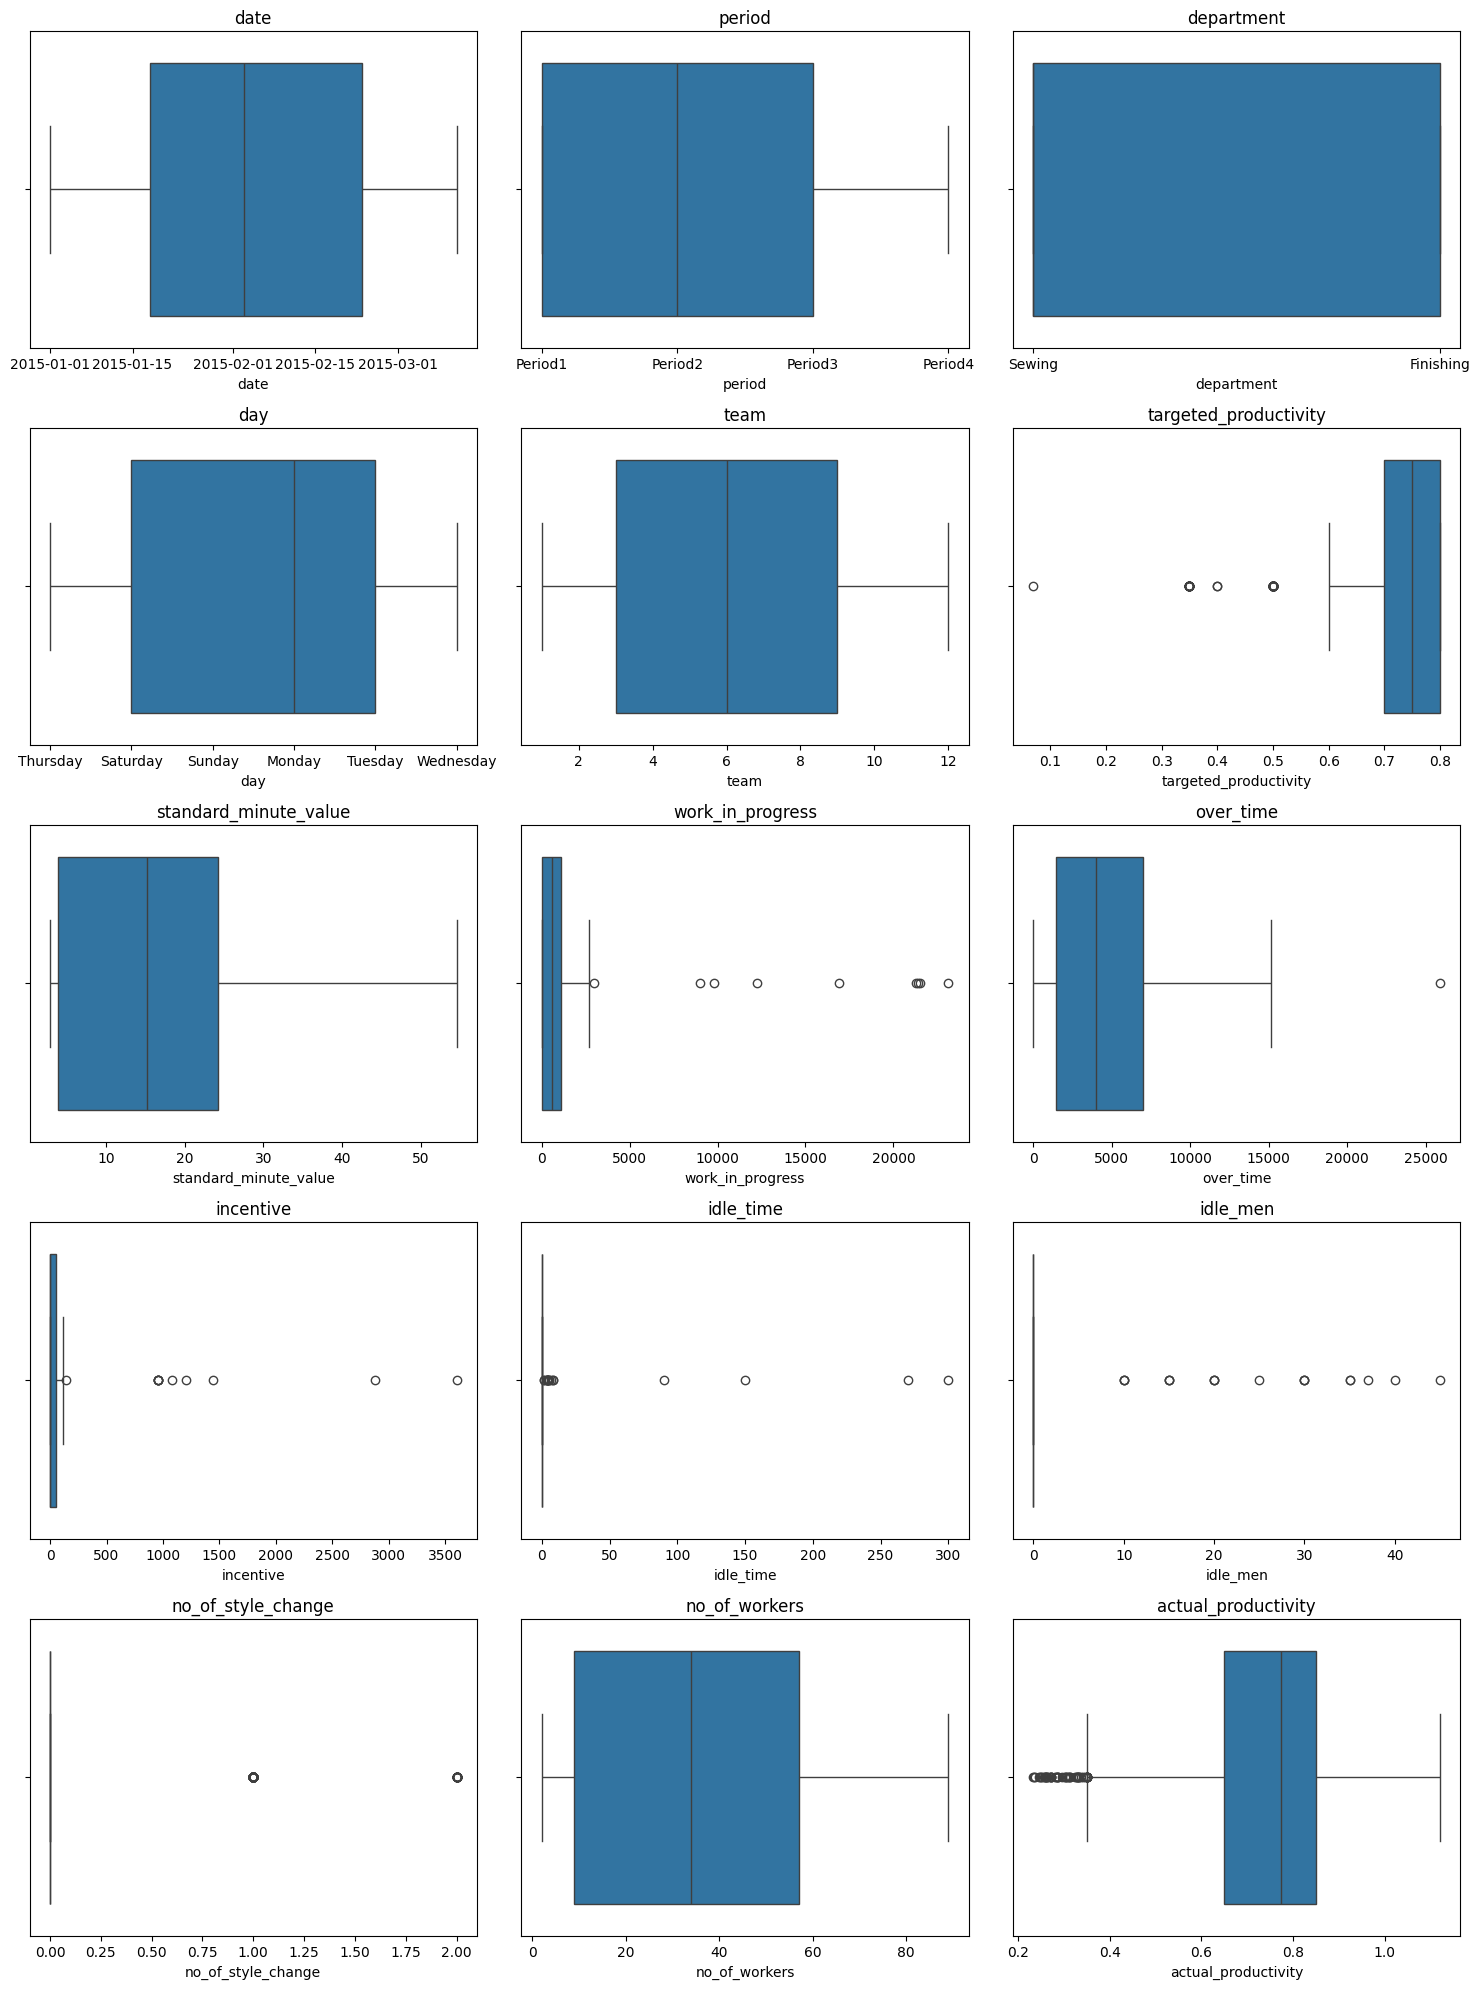

In [102]:
plt.figure(figsize=(15, 20))
for i, column in enumerate(df.columns):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(x=column, data=df)
    plt.title(column)
plt.tight_layout()
plt.show()

**Insights:**
- Data pada kolom `standard_minute_value`, `date`, `period`, `department`, `day`, `team`, dan `no_of_workers` tidak mengalami outlier karena tidak terdapat value di luar whisker
- Data pada kolom `no_of_style_change` memiliki beberapa value yang terletak di luar whisker, namun tidak dianggap sebagai outlier karena merupakan kolom yang digunakan jika ada pergantian pada desain, sehingga kejadian yang terekam adalah kejadian yang tergolong jarang

##### `targeted_productivity` Outlier

d:\Kuliah\Software\Visual Studio Code\Python\Cakap\Project\.venv\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


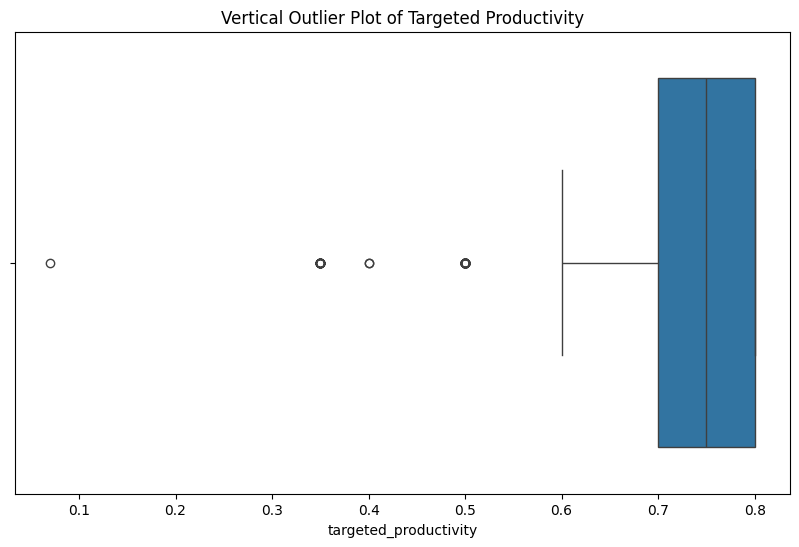

In [103]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="targeted_productivity", data=df, orient="v")
plt.title("Vertical Outlier Plot of Targeted Productivity")
plt.show()

In [104]:
df.targeted_productivity.value_counts()

targeted_productivity
0.80    540
0.70    242
0.75    216
0.65     63
0.60     57
0.50     49
0.35     27
0.40      2
0.07      1
Name: count, dtype: int64

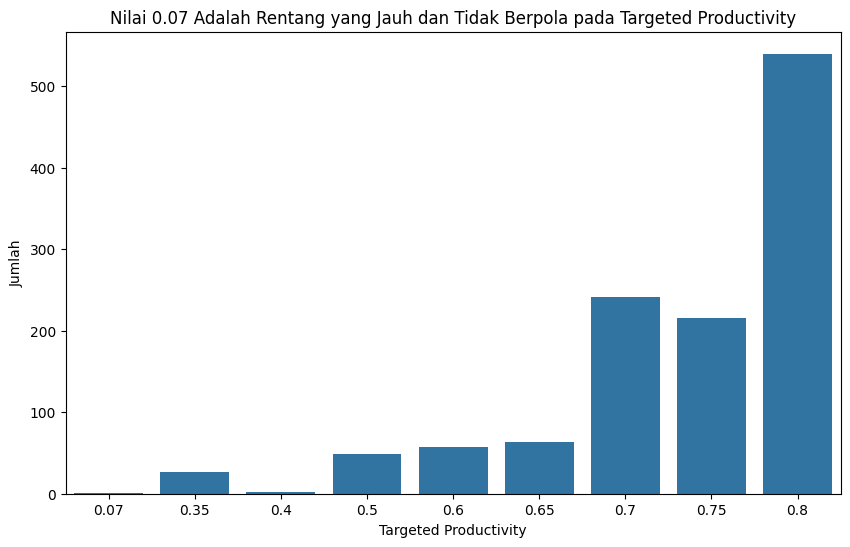

In [105]:
plt.figure(figsize=(10, 6))
sns.countplot(x="targeted_productivity", data=df)
plt.title("Nilai 0.07 Adalah Rentang yang Jauh dan Tidak Berpola pada Targeted Productivity")
plt.xlabel("Targeted Productivity")
plt.ylabel("Jumlah")
plt.show()

**Insights:**
- Secara keseluruhan, value pada `targeted_productivity` memiliki pola puluhan dan bilangan bulat 5
- Terdapat value 0.07 yang sangat jauh dari nilainya yang dapat dikategorikan sebagai **outlier**

In [106]:
df.loc[df['targeted_productivity'] == 0.07]

,date,period,department,day,team,targeted_productivity,standard_minute_value,work_in_progress,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
633,2015-02-05,Period1,Sewing,Thursday,7,0.07,24.26,1608.0,6960,0,0.0,0,0,58,0.522845


In [107]:
# Mencari data dengan value semirip mungkin dengan data outlier
df[(df['targeted_productivity'] <= 0.5) & 
    (df['actual_productivity'] >= 0.5) & 
    (df['department'] == 0) & 
    (df['no_of_style_change'] == 0) & 
    (df['over_time'] >= 6000) &
    (df['work_in_progress'] >= 1000)]

,date,period,department,day,team,targeted_productivity,standard_minute_value,work_in_progress,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity


In [108]:
print('Jumlah baris data dengan value sama atau kurang dari 0.5 adalah', len(df[df['targeted_productivity'] <= 0.5]), 'baris')
print('Persentase data tersebut adalah', len(df[df['targeted_productivity'] <= 0.5]) / len(df) * 100, '%')
print('\nJumlah baris data dengan value kurang dari 0.5 adalah', len(df[df['targeted_productivity'] < 0.5]), 'baris')
print('Persentase data tersebut adalah', len(df[df['targeted_productivity'] < 0.5]) / len(df) * 100, '%')
print('\nJumlah baris data dengan value sama dengan 0.5 adalah', len(df[df['targeted_productivity'] == 0.5]), 'baris')
print('Persentase data tersebut adalah', len(df[df['targeted_productivity'] == 0.5]) / len(df) * 100, '%')

Jumlah baris data dengan value sama atau kurang dari 0.5 adalah 79 baris
Persentase data tersebut adalah 6.599832915622389 %

Jumlah baris data dengan value kurang dari 0.5 adalah 30 baris
Persentase data tersebut adalah 2.506265664160401 %

Jumlah baris data dengan value sama dengan 0.5 adalah 49 baris
Persentase data tersebut adalah 4.093567251461988 %


In [109]:
df.loc[df['targeted_productivity'] == 0.07, 'targeted_productivity'] = 0.5

**Insights:**
- Data outlier dapat diganti namun tetap dalam rentang di luar garis whisker untuk menjaga distribusi data dengan persentase yang lebih besar
- Data dengan value **0.07** pada kolom `targeted_productivity` tersebut memiliki value pada kolom lain yang mirip dengan value **0.5** pada kolom `targeted_productivity` dilihat dari kolom `actual_productivity`, `department`, `over_time`, `work_in_progress`, dan `no_of_style_change`
- Data outlier dengan value **0.07** diganti menjadi **0.5** dengan mempertimbangkan empat hal,
    - Persentase di luar garis whisker memiliki distribusi yang **kurang dari 7%**
    - Persentase data yang memiliki value **0.5** pada kolom `targeted_productivity` adalah **4.1%**
    - Persentase data yang memiliki value **kurang dari 0.5** pada kolom `targeted_productivity` adalah **2.5%**
    - Data pada kolom lain di row outlier lebih konsisten dan relevan pada row dengan value **0.5** pada kolom `targeted_productivity`

##### `work_in_progress` Outlier

d:\Kuliah\Software\Visual Studio Code\Python\Cakap\Project\.venv\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


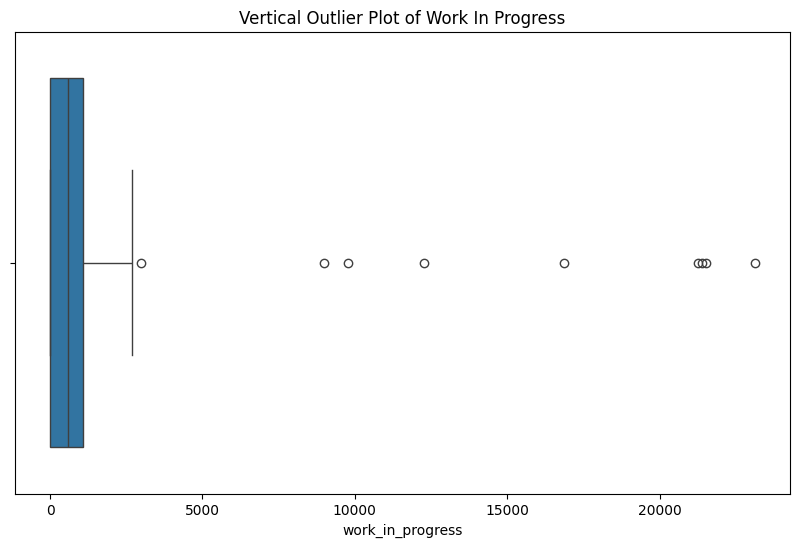

In [110]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="work_in_progress", data=df, orient="v")
plt.title("Vertical Outlier Plot of Work In Progress")
plt.show()

In [111]:
df.nlargest(10, 'work_in_progress')

,date,period,department,day,team,targeted_productivity,standard_minute_value,work_in_progress,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
569,2015-02-02,Period1,Sewing,Monday,4,0.80,22.52,23122.0,5940,50,0.0,0,0,56,0.800393
565,2015-02-02,Period1,Sewing,Monday,10,0.80,22.52,21540.0,6720,88,0.0,0,0,56,0.900130
563,2015-02-02,Period1,Sewing,Monday,2,0.80,22.52,21385.0,7020,88,0.0,0,0,58,0.900158
564,2015-02-02,Period1,Sewing,Monday,3,0.80,22.52,21266.0,6840,70,0.0,0,0,57,0.900142
561,2015-02-02,Period1,Sewing,Monday,1,0.80,22.94,16882.0,7020,113,0.0,0,0,58,1.000602
568,2015-02-02,Period1,Sewing,Monday,12,0.80,15.26,12261.0,3600,63,0.0,0,0,35,0.800402
572,2015-02-02,Period1,Sewing,Monday,11,0.70,20.55,9792.0,6480,60,0.0,0,0,54,0.700398
570,2015-02-02,Period1,Sewing,Monday,9,0.75,29.12,8992.0,6960,55,0.0,0,0,58,0.799963
573,2015-02-02,Period1,Sewing,Monday,6,0.70,18.79,2984.0,3960,30,0.0,0,0,33,0.700355
577,2015-02-02,Period1,Sewing,Monday,7,0.70,24.26,2698.0,6720,0,0.0,0,0,56,0.295308


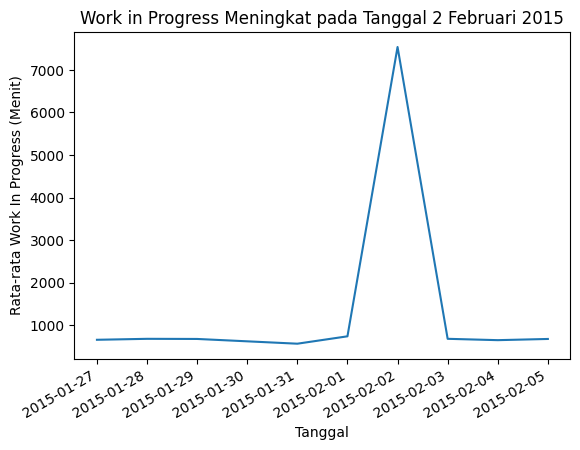

In [112]:
df_temp = df[(df['date'] >= '2015-01-27') & (df['date'] <= '2015-02-06')]
df_temp.groupby('date')['work_in_progress'].mean().plot(kind='line')
plt.title('Work in Progress Meningkat pada Tanggal 2 Februari 2015')
plt.xlabel('Tanggal')
plt.ylabel('Rata-rata Work In Progress (Menit)')
plt.show()

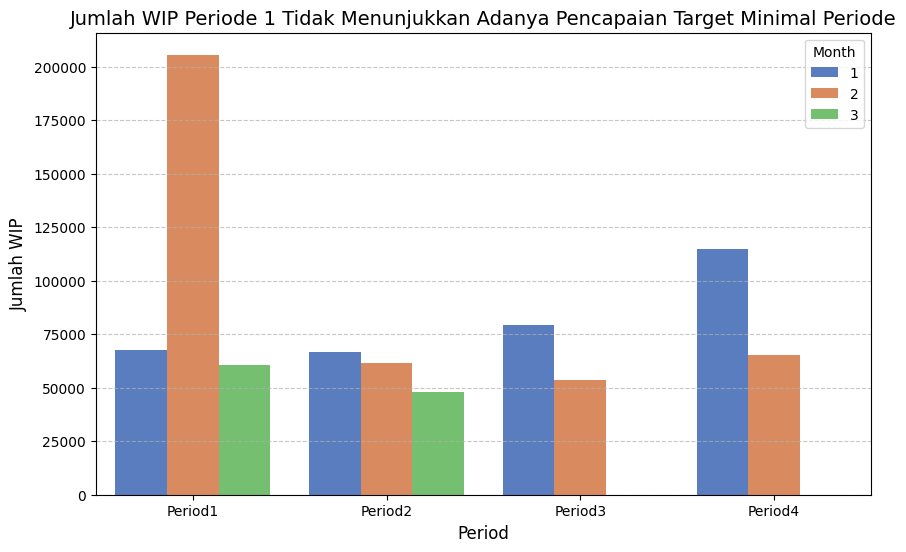

In [113]:
df['month'] = df['date'].dt.month

# Kelompokkan data berdasarkan 'month' dan 'period', lalu hitung jumlah 'wip'
grouped_data = df.groupby(['month', 'period'])['work_in_progress'].sum().reset_index()

# Plot grouped bar chart menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='period', y='work_in_progress', hue='month', palette='muted')

# Tambahkan label dan judul
plt.title('Jumlah WIP Periode 1 Tidak Menunjukkan Adanya Pencapaian Target Minimal Periode', fontsize=14)
plt.xlabel('Period', fontsize=12)
plt.ylabel('Jumlah WIP', fontsize=12)
plt.legend(title='Month', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [114]:
df = df.drop('month', axis=1)

**Insights:**

*Asumsi Pertama*: Outlier yang terdeteksi pada kolom `work_in_progress` bersifat **normal**, hal ini dikarenakan data yang terdeteksi outlier tersebut berada pada **hari yang sama** (`date`, `period`, dan `department` yang sama) sehingga memungkinkan jika pada awal bulan Februari tersebut (tepatnya pada tangga 2 Februari 2015) terdapat pesanan dengan batch yang banyak (lebih banyak dari hari biasanya).

*Asumsi Kedua*: 

##### `over_time` Outlier

d:\Kuliah\Software\Visual Studio Code\Python\Cakap\Project\.venv\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


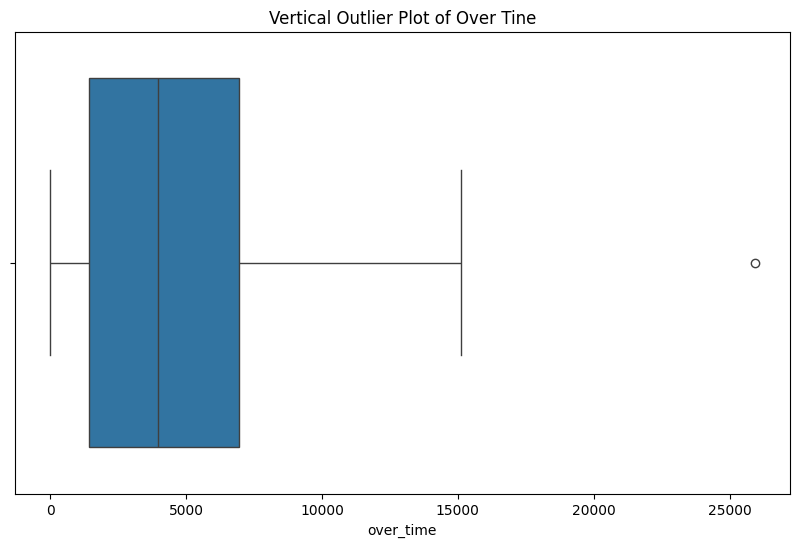

In [115]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="over_time", data=df, orient="v")
plt.title("Vertical Outlier Plot of Over Tine")
plt.show()

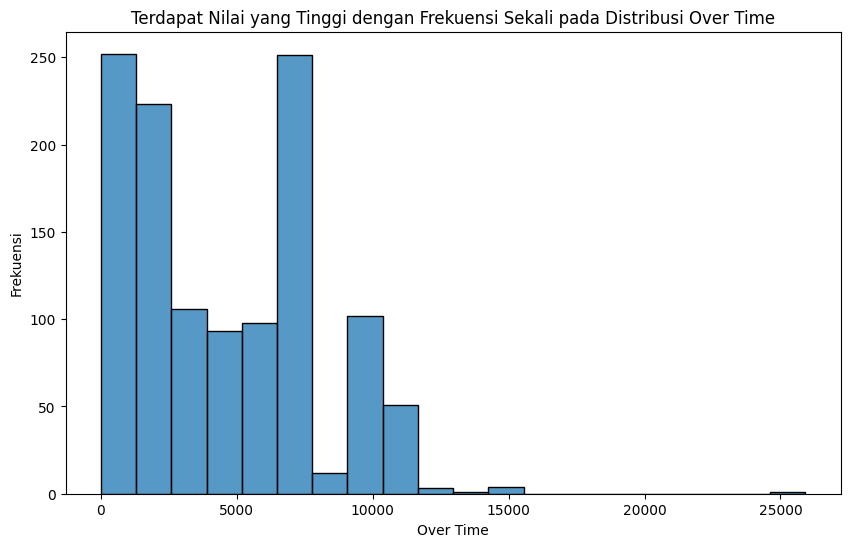

In [116]:
plt.figure(figsize=(10, 6))
sns.histplot(df['over_time'], kde=False, bins=20)
plt.title("Terdapat Nilai yang Tinggi dengan Frekuensi Sekali pada Distribusi Over Time")
plt.xlabel("Over Time")
plt.ylabel("Frekuensi")
plt.show()

In [117]:
df.loc[df['over_time'] > 20000]

,date,period,department,day,team,targeted_productivity,standard_minute_value,work_in_progress,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
146,2015-01-08,Period2,Sewing,Thursday,11,0.35,12.52,287.0,25920,38,0.0,0,0,54,0.349951


In [118]:
df.loc[(df['team'] == 11) & (df['department'] == 'Sewing')].sort_values(by=['over_time', 'targeted_productivity'], ascending=[False, True]).head(10)

,date,period,department,day,team,targeted_productivity,standard_minute_value,work_in_progress,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
146,2015-01-08,Period2,Sewing,Thursday,11,0.35,12.52,287.0,25920,38,0.0,0,0,54,0.349951
455,2015-01-26,Period4,Sewing,Monday,11,0.35,28.08,749.0,10260,23,0.0,0,0,57,0.350067
311,2015-01-18,Period3,Sewing,Sunday,11,0.65,14.89,1140.0,10260,44,0.0,0,0,57,0.650300
329,2015-01-19,Period3,Sewing,Monday,11,0.70,14.89,1484.0,10260,50,0.0,0,0,57,0.700170
346,2015-01-20,Period3,Sewing,Tuesday,11,0.70,14.89,1501.0,10260,50,0.0,0,0,57,0.700170
363,2015-01-21,Period3,Sewing,Wednesday,11,0.70,14.89,1735.0,10260,50,0.0,0,0,57,0.700170
381,2015-01-22,Period4,Sewing,Thursday,11,0.70,14.89,1863.0,10260,50,0.0,0,0,57,0.700170
407,2015-01-24,Period4,Sewing,Saturday,11,0.75,42.97,1282.0,10260,56,0.0,0,0,57,0.750041
434,2015-01-25,Period4,Sewing,Sunday,11,0.75,42.97,532.0,10260,40,0.0,0,0,57,0.591142
295,2015-01-17,Period3,Sewing,Saturday,11,0.60,14.89,1027.0,10080,38,0.0,0,0,56,0.600273


In [119]:
df.loc[(df['date'] == '2015-01-08') & (df['department'] == 'Sewing')].sort_values(by=['team'], ascending=[True])

,date,period,department,day,team,targeted_productivity,standard_minute_value,work_in_progress,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
130,2015-01-08,Period2,Sewing,Thursday,1,0.80,26.16,1189.0,10620,75,0.0,0,0,59,0.850502
136,2015-01-08,Period2,Sewing,Thursday,2,0.80,28.08,783.0,10050,63,0.0,0,0,58,0.800497
137,2015-01-08,Period2,Sewing,Thursday,3,0.80,19.87,857.0,9900,50,0.0,0,0,55,0.800274
131,2015-01-08,Period2,Sewing,Thursday,4,0.80,28.08,942.0,10530,75,0.0,0,0,58,0.850182
147,2015-01-08,Period2,Sewing,Thursday,5,0.70,42.41,724.0,10260,0,0.0,0,0,57,0.233705
139,2015-01-08,Period2,Sewing,Thursday,6,0.80,11.41,411.0,14640,50,0.0,0,0,30,0.800025
132,2015-01-08,Period2,Sewing,Thursday,7,0.80,25.90,1050.0,10170,60,0.0,0,0,56,0.850137
133,2015-01-08,Period2,Sewing,Thursday,8,0.80,25.90,1026.0,10170,60,0.0,0,0,56,0.850137
128,2015-01-08,Period2,Sewing,Thursday,9,0.80,26.16,1216.0,10620,88,0.0,0,0,59,0.900216
140,2015-01-08,Period2,Sewing,Thursday,10,0.75,28.08,1066.0,10530,69,0.0,0,0,58,0.800000


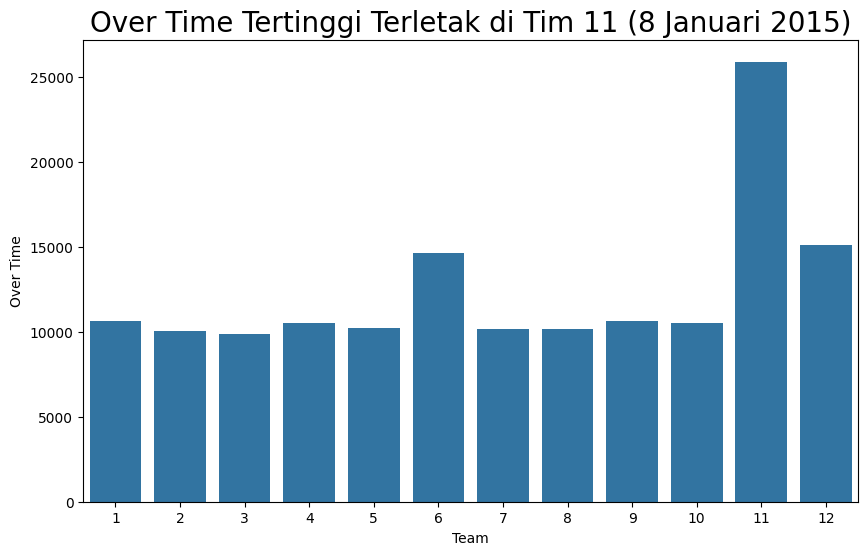

In [120]:
df_temp = df[(df['date'] == '2015-01-08') & (df['department'] == 'Sewing')].groupby('team')['over_time'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=df_temp, x='team', y='over_time')
plt.title("Over Time Tertinggi Terletak di Tim 11 (8 Januari 2015)", fontsize=20)
plt.xlabel("Team")
plt.ylabel("Over Time")
plt.show()


In [121]:
df.loc[df['over_time'] > 20000, 'over_time'] = 10260

**Insights:**

Pada kolom `over_time` terdapat **satu outlier** yang diidentifikasi dengan melihat boxplot, dikategorikan sebagai outlier karena berada di luar garis whisker. Hal ini dilihat lebih lanjut tidak ada korelasi dengan data lain maupun pola yang ada sehingga benar jika value tersebut merupakan outlier yang harus dihandle. Proses handling dilakukan dengan menampilkan row dengan value `over_time` yang dikategorikan sebagai outlier kemudian melihat dari terbesar untuk melihat besaran `over_time` yang ada. Hal ini kemudian didapatkan besaran value pada `over_time` dan didapatkan tanggal, pengecekan dilakukan pada tanggal yang sama dan terbukti 10 dari 11 team (di luar team yang memiliki value outlier) pada department sewing memiliki value lebih dari 10000. Dari data dan analisis yang didapatkan, sehingga dilakukan proses handling berupa penggantian data menjadi 10260 mengikuti kinerja terburuk `over_time` pada team 11 (team yang memiliki outlier) dan masih masuk akal dengan team lain pada department sewing pada tanggal 8 Januari 2015

##### `incentive` Outlier

d:\Kuliah\Software\Visual Studio Code\Python\Cakap\Project\.venv\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


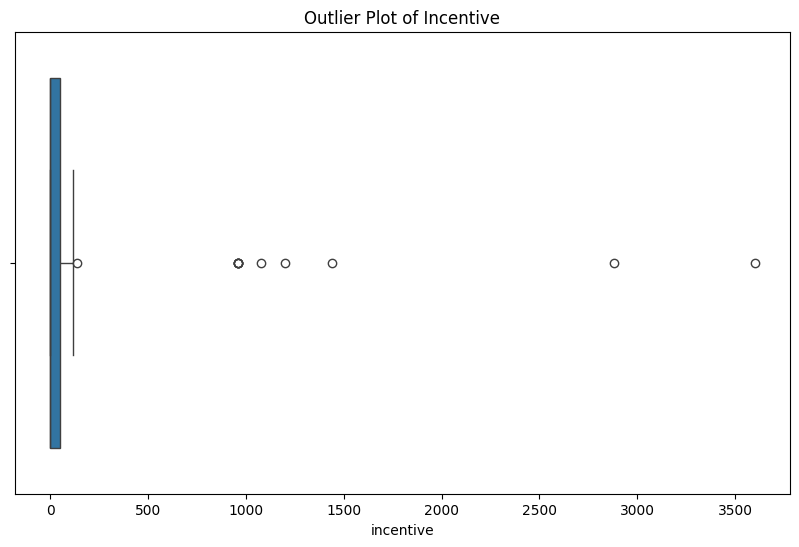

In [122]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="incentive", data=df, orient="v")
plt.title("Outlier Plot of Incentive")
plt.show()

In [123]:
df.loc[df['incentive'] > 500].sort_values(by=['incentive'], ascending=[False])

,date,period,department,day,team,targeted_productivity,standard_minute_value,work_in_progress,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1133,2015-03-09,Period2,Finishing,Monday,9,0.75,2.90,0.0,0,3600,0.0,0,0,15,0.841000
1130,2015-03-09,Period2,Finishing,Monday,5,0.60,3.94,0.0,0,2880,0.0,0,0,12,0.864343
1137,2015-03-09,Period2,Finishing,Monday,3,0.80,4.60,0.0,0,1440,0.0,0,0,12,0.795417
1143,2015-03-09,Period2,Finishing,Monday,2,0.70,3.90,0.0,0,1200,0.0,0,0,10,0.682500
1129,2015-03-09,Period2,Finishing,Monday,12,0.80,4.60,0.0,0,1080,0.0,0,0,9,0.902963
1128,2015-03-09,Period2,Finishing,Monday,11,0.80,2.90,0.0,0,960,0.0,0,0,8,0.960625
1138,2015-03-09,Period2,Finishing,Monday,4,0.75,3.94,0.0,0,960,0.0,0,0,8,0.795388
1139,2015-03-09,Period2,Finishing,Monday,1,0.75,3.94,0.0,0,960,0.0,0,0,8,0.794567
1148,2015-03-09,Period2,Finishing,Monday,10,0.70,2.90,0.0,0,960,0.0,0,0,8,0.477292
1149,2015-03-09,Period2,Finishing,Monday,8,0.65,3.90,0.0,0,960,0.0,0,0,8,0.264062


##### `idle_time` Outlier

d:\Kuliah\Software\Visual Studio Code\Python\Cakap\Project\.venv\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


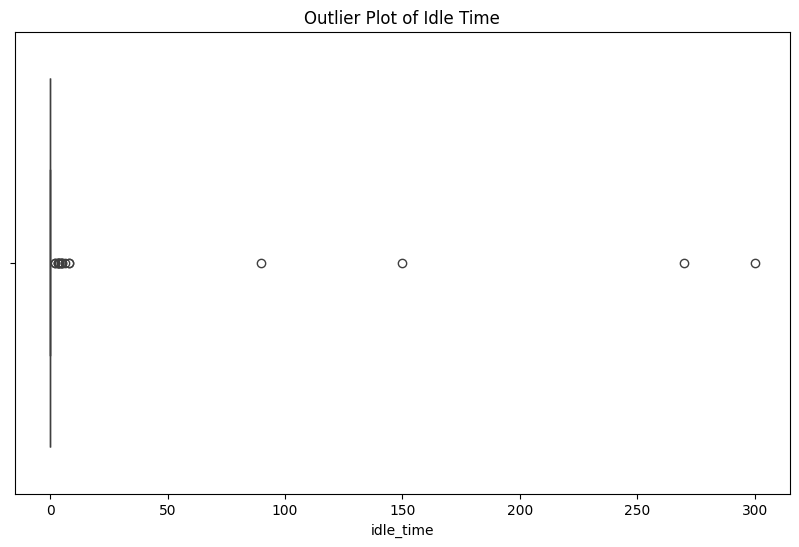

In [124]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="idle_time", data=df, orient="v")
plt.title("Outlier Plot of Idle Time")
plt.show()

In [125]:
df.loc[df['idle_time'] > 50]

,date,period,department,day,team,targeted_productivity,standard_minute_value,work_in_progress,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
615,2015-02-04,Period1,Sewing,Wednesday,5,0.65,30.10,326.0,5820,0,90.0,10,0,58,0.650835
617,2015-02-04,Period1,Sewing,Wednesday,4,0.35,30.10,287.0,6060,23,150.0,15,0,55,0.350706
650,2015-02-07,Period1,Sewing,Saturday,7,0.70,24.26,658.0,6960,0,270.0,45,0,58,0.662270
654,2015-02-07,Period1,Sewing,Saturday,8,0.70,24.26,652.0,6840,0,300.0,37,0,57,0.365319


In [126]:
df.sort_values(by='idle_time', ascending=False).head(10)

,date,period,department,day,team,targeted_productivity,standard_minute_value,work_in_progress,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
654,2015-02-07,Period1,Sewing,Saturday,8,0.70,24.26,652.0,6840,0,300.0,37,0,57,0.365319
650,2015-02-07,Period1,Sewing,Saturday,7,0.70,24.26,658.0,6960,0,270.0,45,0,58,0.662270
617,2015-02-04,Period1,Sewing,Wednesday,4,0.35,30.10,287.0,6060,23,150.0,15,0,55,0.350706
615,2015-02-04,Period1,Sewing,Wednesday,5,0.65,30.10,326.0,5820,0,90.0,10,0,58,0.650835
822,2015-02-17,Period3,Sewing,Tuesday,10,0.65,18.22,741.0,0,0,8.0,35,1,49,0.302117
841,2015-02-18,Period3,Sewing,Wednesday,10,0.70,19.68,1119.0,5640,0,8.0,35,1,47,0.303574
1046,2015-03-03,Period1,Sewing,Tuesday,2,0.40,15.28,157.0,5400,0,6.5,30,1,45,0.302770
818,2015-02-17,Period3,Sewing,Tuesday,8,0.60,29.40,179.0,0,23,5.0,30,2,58,0.600983
860,2015-02-19,Period3,Sewing,Thursday,7,0.75,30.10,444.0,0,0,5.0,20,1,59,0.611141
843,2015-02-18,Period3,Sewing,Wednesday,8,0.65,29.40,962.0,4560,0,4.5,30,2,57,0.251399


##### `idle_men` and `idle_time` Outlier 

d:\Kuliah\Software\Visual Studio Code\Python\Cakap\Project\.venv\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


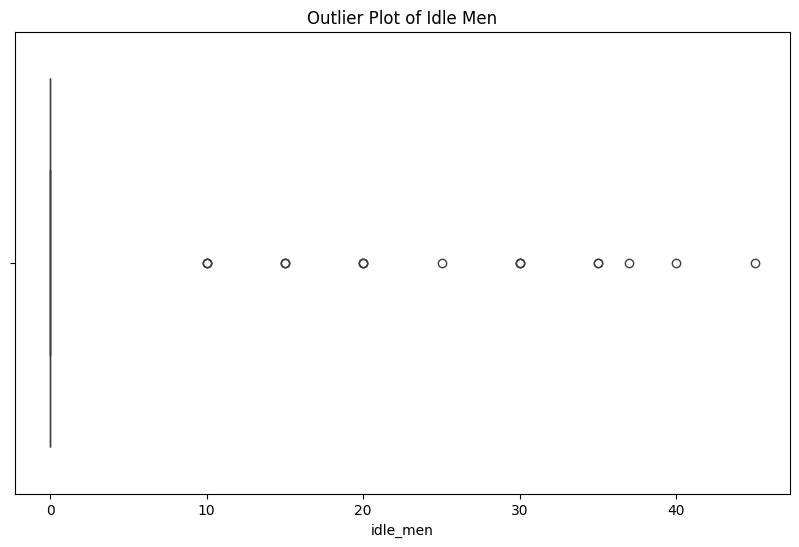

In [127]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="idle_men", data=df, orient="v")
plt.title("Outlier Plot of Idle Men")
plt.show()

In [128]:
df['idle_men'].value_counts()

idle_men
0     1179
10       3
15       3
30       3
20       3
35       2
37       1
45       1
25       1
40       1
Name: count, dtype: int64

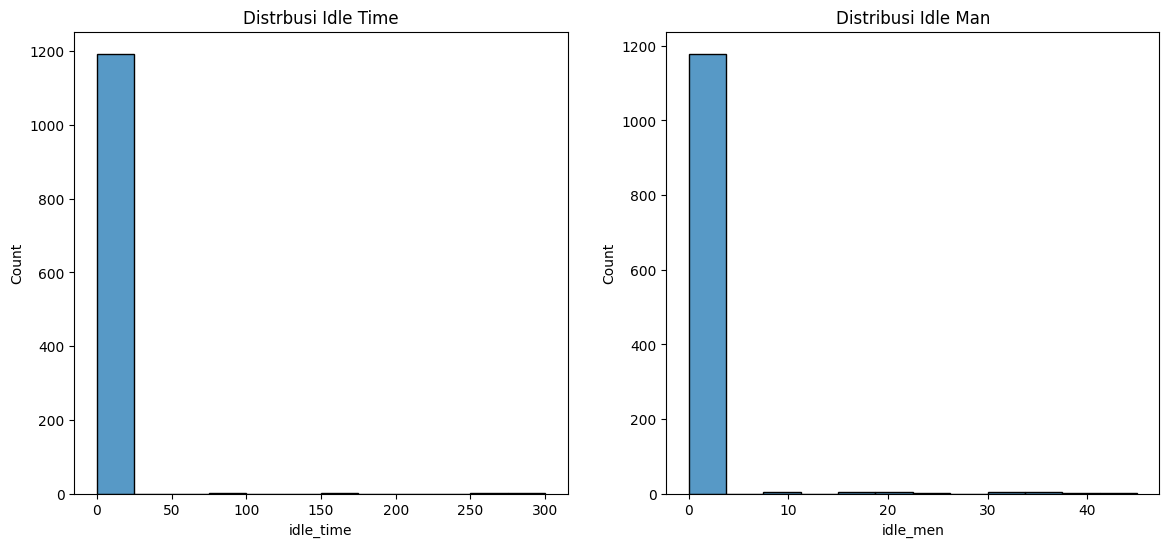

In [129]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(df['idle_time'], kde=False, ax=ax1)
ax1.set_title("Distrbusi Idle Time")
sns.histplot(df['idle_men'], kde=False, ax=ax2)
ax2.set_title("Distribusi Idle Man")
plt.show()

##### `no_of_style_change` Outlier

d:\Kuliah\Software\Visual Studio Code\Python\Cakap\Project\.venv\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


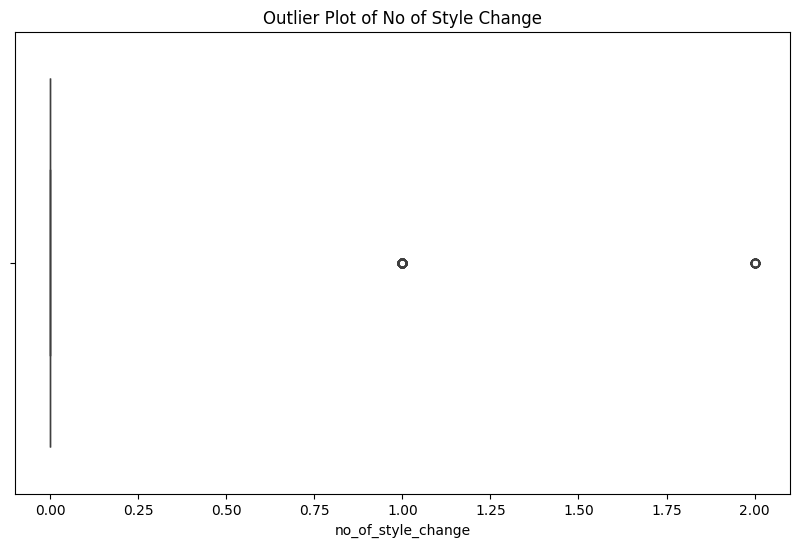

In [130]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="no_of_style_change", data=df, orient="v")
plt.title("Outlier Plot of No of Style Change")
plt.show()

In [131]:
df['no_of_style_change'].value_counts()

no_of_style_change
0    1050
1     114
2      33
Name: count, dtype: int64

##### `actual_productivity` Outlier

d:\Kuliah\Software\Visual Studio Code\Python\Cakap\Project\.venv\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


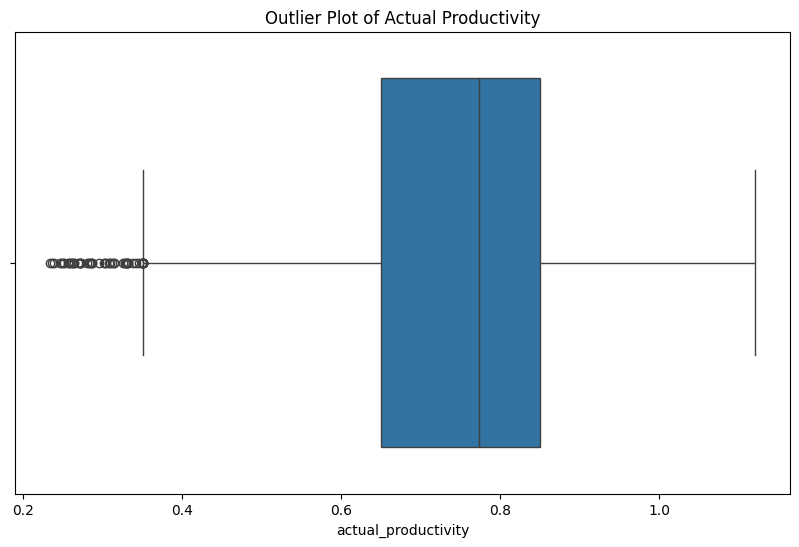

In [132]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="actual_productivity", data=df, orient="v")
plt.title("Outlier Plot of Actual Productivity")
plt.show()

In [133]:
df['actual_productivity'].value_counts()

actual_productivity
0.800402    24
0.850137    12
0.971867    12
0.850502    11
1.000230    11
            ..
0.700557     1
0.650596     1
0.700481     1
0.505889     1
0.456875     1
Name: count, Length: 879, dtype: int64

### Encoding Data

In [134]:
df.head()

,date,period,department,day,team,targeted_productivity,standard_minute_value,work_in_progress,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,Period1,Sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59,0.940725
1,2015-01-01,Period1,Finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8,0.886500
2,2015-01-01,Period1,Sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30,0.800570
3,2015-01-01,Period1,Sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30,0.800570
4,2015-01-01,Period1,Sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56,0.800382


In [135]:
tf_df = pd.get_dummies(df, columns=['period', 'department', 'day', 'team'])
tf_df.head()

,date,targeted_productivity,standard_minute_value,work_in_progress,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,team_3,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12
0,2015-01-01,0.80,26.16,1108.0,7080,98,0.0,0,0,59,...,False,False,False,False,False,True,False,False,False,False
1,2015-01-01,0.75,3.94,0.0,960,0,0.0,0,0,8,...,False,False,False,False,False,False,False,False,False,False
2,2015-01-01,0.80,11.41,968.0,3660,50,0.0,0,0,30,...,False,False,False,False,False,False,False,False,True,False
3,2015-01-01,0.80,11.41,968.0,3660,50,0.0,0,0,30,...,False,False,False,False,False,False,False,False,False,True
4,2015-01-01,0.80,25.90,1170.0,1920,50,0.0,0,0,56,...,False,False,False,True,False,False,False,False,False,False


In [136]:
num_map_period = {'Period1': 0, 'Period2': 1, 'Period3': 2, 'Period4': 3, 'Period5': 4}
num_map_day = {'Saturday': 0, 'Sunday': 1, 'Monday': 2, 'Tuesday': 3, 'Wednesday': 4, 'Thursday': 5}
num_map_department = {'Sewing': 0, 'Finishing': 1}

num_df = df.copy()
num_df['period'] = num_df['period'].map(num_map_period)
num_df['day'] = num_df['day'].map(num_map_day)
num_df['department'] = num_df['department'].map(num_map_department)

num_df.head()

,date,period,department,day,team,targeted_productivity,standard_minute_value,work_in_progress,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,0,0,5,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59,0.940725
1,2015-01-01,0,1,5,1,0.75,3.94,0.0,960,0,0.0,0,0,8,0.886500
2,2015-01-01,0,0,5,11,0.80,11.41,968.0,3660,50,0.0,0,0,30,0.800570
3,2015-01-01,0,0,5,12,0.80,11.41,968.0,3660,50,0.0,0,0,30,0.800570
4,2015-01-01,0,0,5,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56,0.800382


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   period                 1197 non-null   object        
 2   department             1197 non-null   object        
 3   day                    1197 non-null   object        
 4   team                   1197 non-null   int64         
 5   targeted_productivity  1197 non-null   float64       
 6   standard_minute_value  1197 non-null   float64       
 7   work_in_progress       1197 non-null   float64       
 8   over_time              1197 non-null   int64         
 9   incentive              1197 non-null   int64         
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   int64         
 13  no_

## Exploratory Data Analysis (EDA)

### Data Correlation

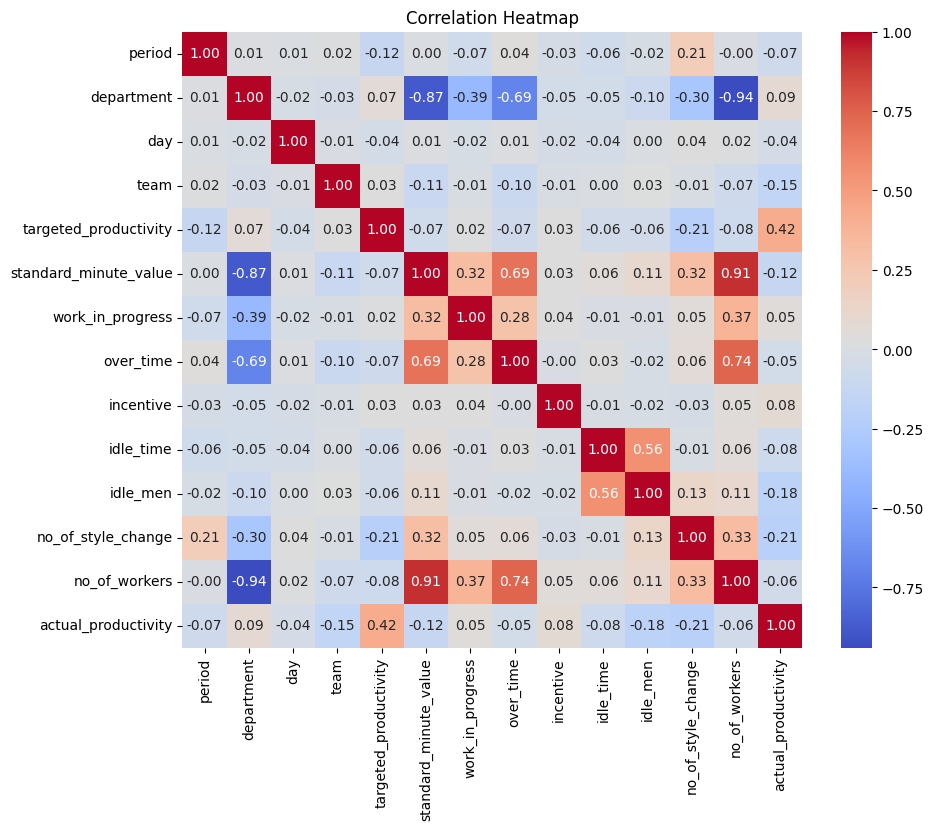

In [138]:
correlation_matrix = num_df.corr(method='pearson', numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

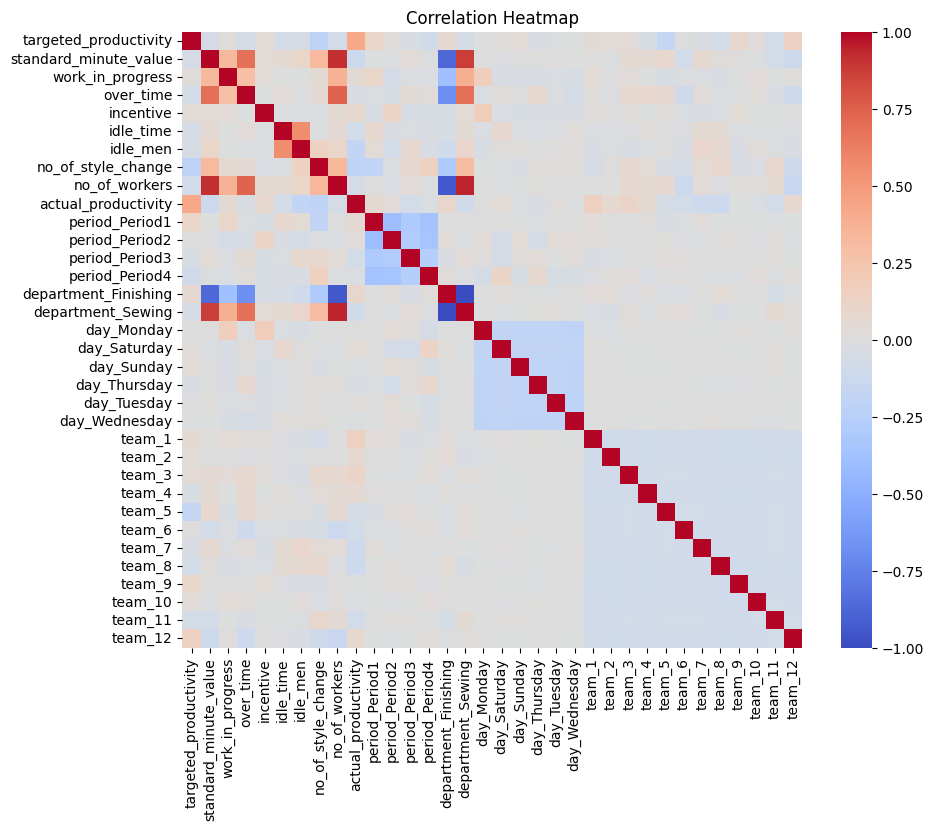

In [139]:
correlation_matrix = tf_df.corr(method='pearson', numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

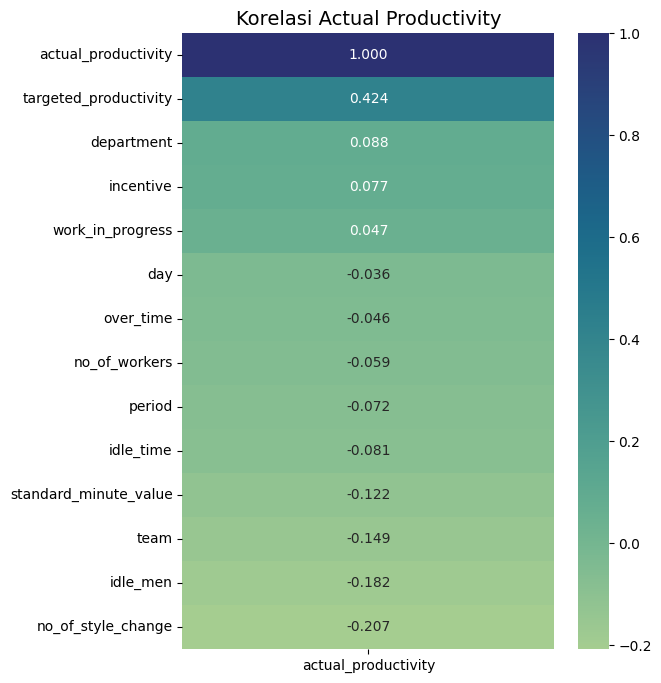

In [140]:
correlation_matrix = num_df.corr(method='pearson', numeric_only=True)

actual_productivity_correlation = correlation_matrix[['actual_productivity']].sort_values(by='actual_productivity', ascending=False)

plt.figure(figsize=(6, 8))
sns.heatmap(actual_productivity_correlation, annot=True, cmap='crest', fmt='.3f', cbar=True)

plt.title('Korelasi Actual Productivity', fontsize=14)
plt.show()

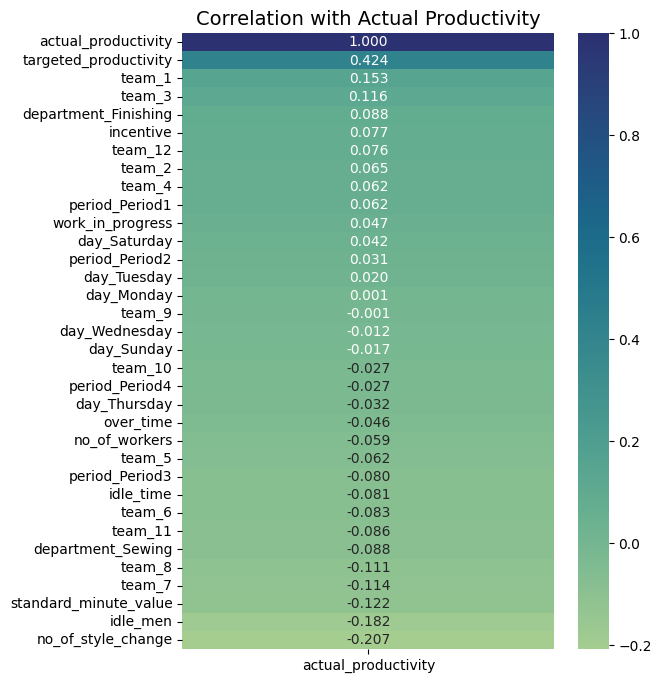

In [141]:
correlation_matrix = tf_df.corr(method='pearson', numeric_only=True)

actual_productivity_correlation = correlation_matrix[['actual_productivity']].sort_values(by='actual_productivity', ascending=False)

plt.figure(figsize=(6, 8))
sns.heatmap(actual_productivity_correlation, annot=True, cmap='crest', fmt='.3f', cbar=True)

plt.title('Correlation with Actual Productivity', fontsize=14)
plt.show()

### `targeted_productivity` vs `actual_productivity`

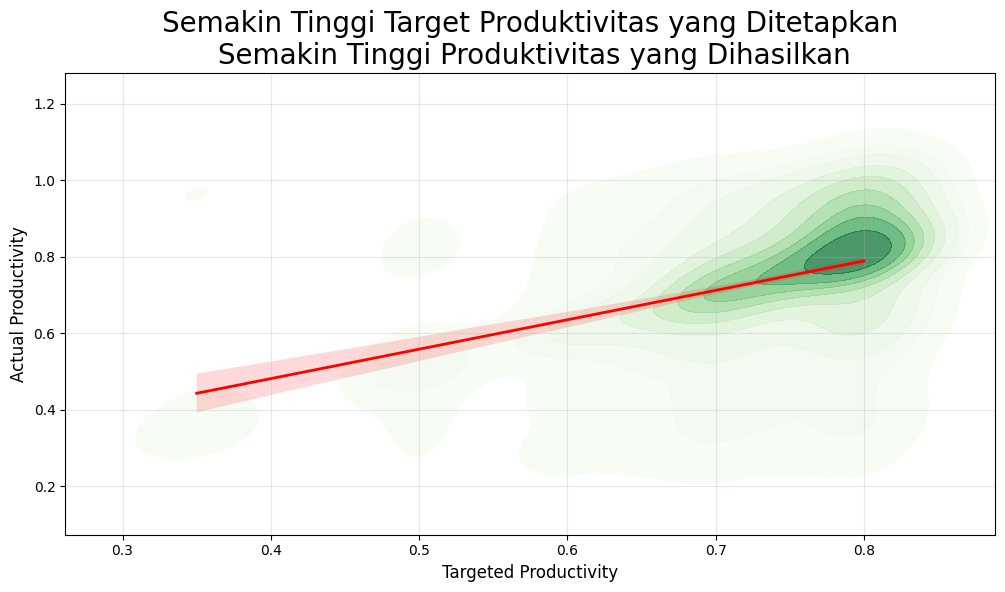

In [142]:
plt.figure(figsize=(12, 6))

sns.kdeplot(
    x=df['targeted_productivity'],
    y=df['actual_productivity'],
    cmap='Greens',
    fill=True,
    alpha=0.7
)

sns.regplot(
    x='targeted_productivity',
    y='actual_productivity',
    data=df,
    scatter=False,
    line_kws={'color': 'red', 'linewidth': 2}
)

plt.title('Semakin Tinggi Target Produktivitas yang Ditetapkan' '\n' ' Semakin Tinggi Produktivitas yang Dihasilkan', fontsize=20)
plt.xlabel('Targeted Productivity', fontsize=12)
plt.ylabel('Actual Productivity', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

#### `department` vs `actual_productivity`

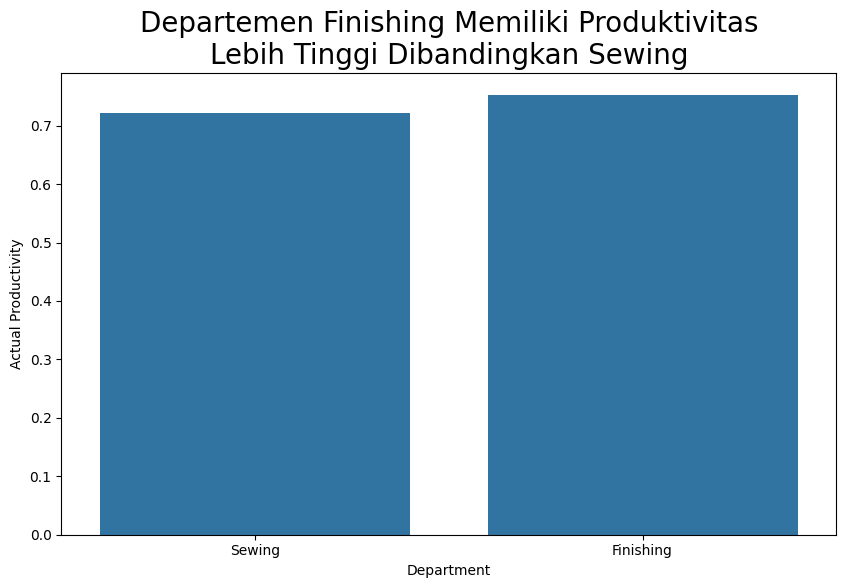

In [143]:
plt.figure(figsize=(10, 6))
sns.barplot(x='department', y='actual_productivity', data=df, estimator='mean', errorbar=None)
plt.title('Departemen Finishing Memiliki Produktivitas\nLebih Tinggi Dibandingkan Sewing', fontsize=20)
plt.xlabel('Department')
plt.ylabel('Actual Productivity')
plt.show()

In [144]:
groups = [df[df['department'] == day]['actual_productivity'] for day in df['department'].unique()]

stat, p = kruskal(*groups)

alpha = 0.05

print(f"Kruskal-Wallis stat={stat}, p-value={p}")
if p < alpha:
    print(f"Tolak H0: Ada perbedaan signifikan antara grup (p < {alpha}).")
else:
    print(f"Gagal menolak H0: Tidak ada perbedaan signifikan antara grup (p >= {alpha}).")

Kruskal-Wallis stat=27.288442517046633, p-value=1.7525582757876983e-07
Tolak H0: Ada perbedaan signifikan antara grup (p < 0.05).


In [145]:
posthoc = sp.posthoc_dunn(df, val_col='actual_productivity', group_col='department', p_adjust='bonferroni')

print(posthoc)

              Finishing        Sewing
Finishing  1.000000e+00  1.752558e-07
Sewing     1.752558e-07  1.000000e+00


In [146]:
print(posthoc < 0.05)

           Finishing  Sewing
Finishing      False    True
Sewing          True   False


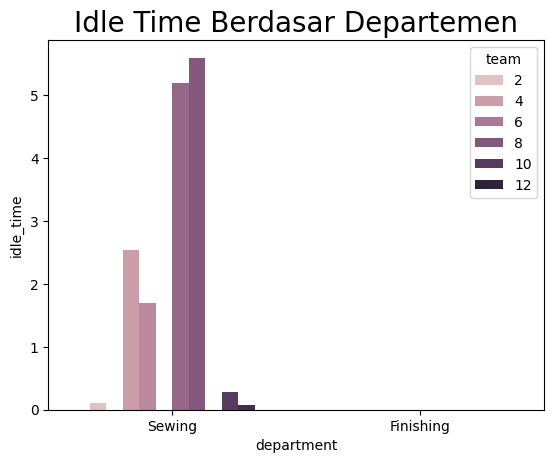

In [147]:
sns.barplot(x='department', y='idle_time',hue ='team' ,data=df, errorbar=None)
plt.title("Idle Time Berdasar Departemen", fontsize=20)
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_24940\3637898859.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='department', y='idle_men',hue ='team' ,data=df, ci= None, estimator=sum)


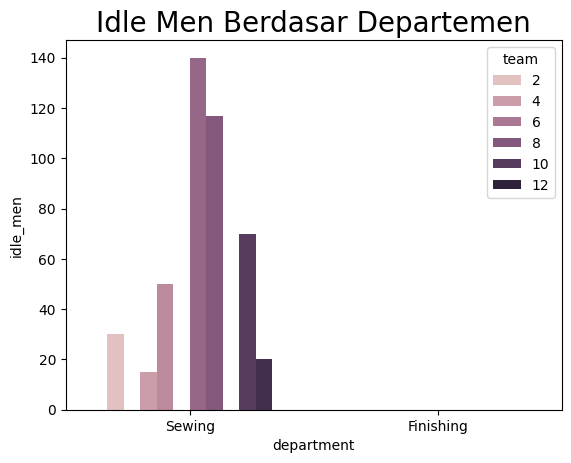

In [148]:
sns.barplot(x='department', y='idle_men',hue ='team' ,data=df, ci= None, estimator=sum)
plt.title("Idle Men Berdasar Departemen", fontsize=20)
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_24940\3767328932.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='department', y='no_of_style_change',hue ='team' ,data=df, ci= None, estimator=sum)


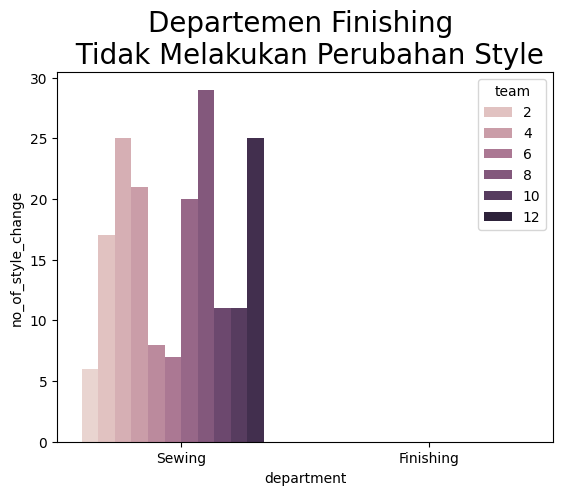

In [149]:
sns.barplot(x='department', y='no_of_style_change',hue ='team' ,data=df, ci= None, estimator=sum)
plt.title("Departemen Finishing \n Tidak Melakukan Perubahan Style", fontsize=20)
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_24940\758627688.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax1 = sns.lineplot(x='date', y='actual_productivity', data=df_temp, ci=None, color='blue', label='Actual Productivity')
C:\Users\ACER\AppData\Local\Temp\ipykernel_24940\758627688.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='date', y='incentive', data=df_temp, ci=None, color='green', ax=ax2, label='Incentive')


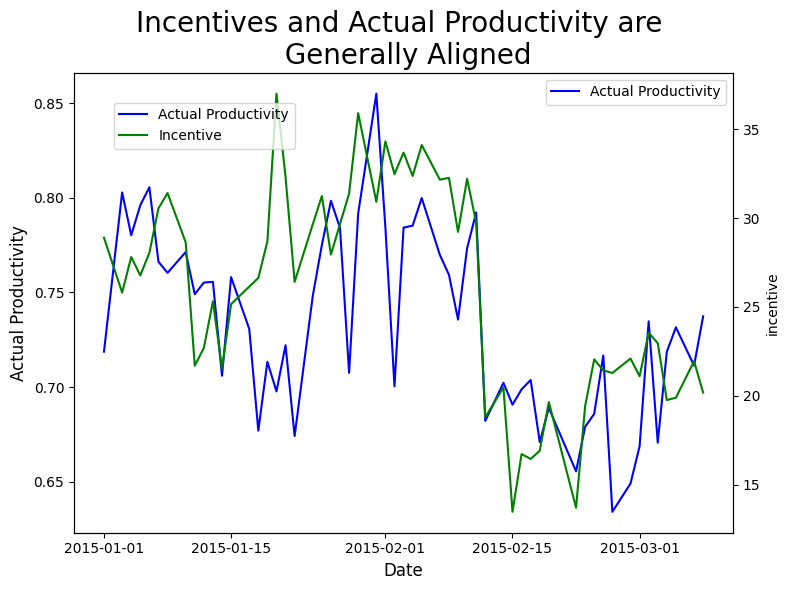

In [150]:

df_temp = df[df.date <= pd.to_datetime('2015-03-08')]  # Filter data hingga 8 Maret 2015

plt.figure(figsize=(8, 6))

# Axis pertama untuk actual_productivity
ax1 = sns.lineplot(x='date', y='actual_productivity', data=df_temp, ci=None, color='blue', label='Actual Productivity')

# Axis kedua untuk incentive
ax2 = ax1.twinx()
sns.lineplot(x='date', y='incentive', data=df_temp, ci=None, color='green', ax=ax2, label='Incentive')

# Gabungkan legend dari kedua axis
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', bbox_to_anchor=(0.05, 0.95), frameon=True, fontsize=10)

# Tambahkan judul dan label
plt.title("Incentives and Actual Productivity are \n Generally Aligned", fontsize=20)
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Actual Productivity", fontsize=12)

# Tampilkan plot
plt.tight_layout()
plt.show()

#### `team` vs `actual_productivity`

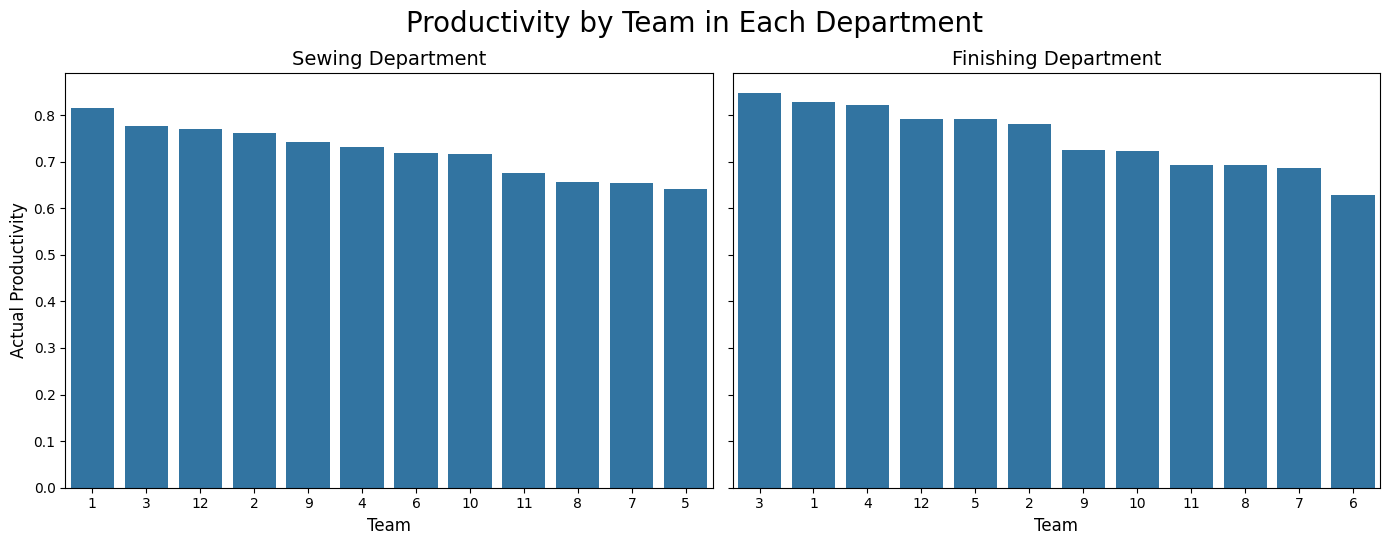

In [151]:

# Filter data untuk setiap departemen
sewing_df = df[df['department'] == 'Sewing']
finishing_df = df[df['department'] == 'Finishing']

# Urutan tim berdasarkan rata-rata produktivitas
sewing_order = sewing_df.groupby('team')['actual_productivity'].mean().sort_values(ascending=False).index
finishing_order = finishing_df.groupby('team')['actual_productivity'].mean().sort_values(ascending=False).index

# Membuat subplot dengan 2 kolom
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot untuk departemen Sewing
sns.barplot(
    x='team',
    y='actual_productivity',
    data=sewing_df,
    estimator='mean',
    order=sewing_order,
    ax=axes[0],
    errorbar=None
)
axes[0].set_title('Sewing Department', fontsize=14)
axes[0].set_xlabel('Team', fontsize=12)
axes[0].set_ylabel('Actual Productivity', fontsize=12)

# Plot untuk departemen Finishing
sns.barplot(
    x='team',
    y='actual_productivity',
    data=finishing_df,
    estimator='mean',
    order=finishing_order,
    ax=axes[1],
    errorbar=None
)
axes[1].set_title('Finishing Department', fontsize=14)
axes[1].set_xlabel('Team', fontsize=12)
axes[1].set_ylabel('')  # Tidak perlu label y di subplot kedua

# Mengatur layout
plt.suptitle('Productivity by Team in Each Department', fontsize=20, y=0.90)
plt.tight_layout(rect=[0, 0, 1, 0.93])  # Beri ruang untuk judul utama
plt.show()


## Modeling

In [152]:
import scipy as sp

from sklearn import metrics

# Model Selection dan Evaluasi
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Preprocessing
from sklearn.preprocessing import StandardScaler

In [153]:
num_df.drop(columns=['date'], inplace=True, axis=1)
print(num_df.columns)

Index(['period', 'department', 'day', 'team', 'targeted_productivity',
       'standard_minute_value', 'work_in_progress', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity'],
      dtype='object')


In [154]:
X = num_df.drop(['actual_productivity'], axis=1)
y = num_df['actual_productivity']

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)

In [156]:
x_cols = X.columns
x_cols

Index(['period', 'department', 'day', 'team', 'targeted_productivity',
       'standard_minute_value', 'work_in_progress', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers'],
      dtype='object')

In [157]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [158]:
mae_list = []
mse_list = []
rmse_list = []
mape_list = []
r2_list = []
accuracy_list = []

### Linier Regression

In [159]:
regression = LinearRegression()
regression.fit(X_train_sc,y_train)

y_pred = regression.predict(X_test_sc)

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

mae_list.append((f'Baseline linear model MAE: {mae}'))
mse_list.append((f'Baseline linear model MSE: {mse}'))
rmse_list.append((f'Baseline linear model RMSE: {rmse}'))
mape_list.append((f'Baseline linear model MAPE: {mape}'))
r2_list.append((f'Baseline linear model R2: {r2}'))

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mape)
print('R2 Score:', r2)

Mean Absolute Error: 0.1036320911372972
Mean Squared Error: 0.02059537655493081
Root Mean Squared Error: 0.14351089350614055
Mean Absolute Percentage Error: 18.465274557942088
R2 Score: 0.30340661312651995


### Random Forest

In [160]:
forest = RandomForestRegressor(n_estimators = 100, random_state=0, min_samples_split = 20, max_depth=5)
forest.fit(X_train, y_train)

# predicting
y_pred = forest.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

mae_list.append((f'Baseline forest model MAE: {mae}'))
mse_list.append((f'Baseline forest model MSE: {mse}'))
rmse_list.append((f'Baseline forest model RMSE: {rmse}'))
mape_list.append((f'Baseline forest model MAPE: {mape}'))
r2_list.append((f'Baseline forest model R2: {r2}'))

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mape)
print('R2 Score:', r2)

Mean Absolute Error: 0.08629067979165458
Mean Squared Error: 0.015563364444168693
Root Mean Squared Error: 0.12475321416367874
Mean Absolute Percentage Error: 15.508458405448627
R2 Score: 0.47360337304858824


In [161]:
parameters = {'n_estimators': np.arange(50, 500, 50),
                'min_samples_split': np.arange(5, 30, 5),
                'max_depth': np.arange(2,7)}
rforest = RandomForestRegressor(random_state=0)
search = GridSearchCV(estimator=rforest,param_grid=parameters,scoring='neg_mean_squared_error')
search.fit(X_train,y_train)
print(search.best_params_)

d:\Kuliah\Software\Visual Studio Code\Python\Cakap\Project\.venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'max_depth': np.int64(6), 'min_samples_split': np.int64(10), 'n_estimators': np.int64(250)}


In [162]:
forest = RandomForestRegressor(n_estimators = 50, random_state=0, min_samples_split = 10, max_depth=6)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

mae_list.append((f'Baseline forestv2 model MAE: {mae}'))
mse_list.append((f'Baseline forestv2 model MSE: {mse}'))
rmse_list.append((f'Baseline forestv2 model RMSE: {rmse}'))
mape_list.append((f'Baseline forestv2 model MAPE: {mape}'))
r2_list.append((f'Baseline forestv2 model R2: {r2}'))

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mape)
print('R2 Score:', r2)

Mean Absolute Error: 0.0832768541888557
Mean Squared Error: 0.014993902102443368
Root Mean Squared Error: 0.12244959004604045
Mean Absolute Percentage Error: 14.832137329645095
R2 Score: 0.49286418628311857


### Gradient Boosting

In [163]:
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, max_depth=5, random_state=0)
gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

mae_list.append((f'Baseline gradientboost model MAE: {mae}'))
mse_list.append((f'Baseline gradientboost model MSE: {mse}'))
rmse_list.append((f'Baseline gradientboost model RMSE: {rmse}'))
mape_list.append((f'Baseline gradientboost model MAPE: {mape}'))
r2_list.append((f'Baseline gradientboost model R2: {r2}'))

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mape)
print('R2 Score:', r2)

Mean Absolute Error: 0.09621111035191807
Mean Squared Error: 0.01807071342501611
Root Mean Squared Error: 0.13442735370829895
Mean Absolute Percentage Error: 17.37172659032562
R2 Score: 0.38879779962370653


In [164]:
parameters = {'n_estimators': np.arange(100, 500, 100),
                'learning_rate': [0.01, 0.1, 1],
                'max_depth': np.arange(2,7)}
gdbr = GradientBoostingRegressor(random_state=0)

#finding values
search = GridSearchCV(estimator=gdbr,param_grid=parameters,scoring='neg_mean_squared_error')
search.fit(X_train,y_train)
print(search.best_params_)

{'learning_rate': 0.1, 'max_depth': np.int64(2), 'n_estimators': np.int64(200)}


In [165]:
gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=2, random_state=0)
gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

mae_list.append((f'Baseline gradientboostv2 model MAE: {mae}'))
mse_list.append((f'Baseline gradientboostv2 model MSE: {mse}'))
rmse_list.append((f'Baseline gradientboostv2 model RMSE: {rmse}'))
mape_list.append((f'Baseline gradientboostv2 model MAPE: {mape}'))
r2_list.append((f'Baseline gradientboostv2 model R2: {r2}'))

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mape)
print('R2 Score:', r2)

Mean Absolute Error: 0.08202294187814545
Mean Squared Error: 0.015049640204288417
Root Mean Squared Error: 0.12267697503724331
Mean Absolute Percentage Error: 14.48939154355186
R2 Score: 0.49097896738272195


### Feature Importance

Variable: targeted_productivity, Importance: 0.26
Variable: standard_minute_value, Importance: 0.22
Variable: incentive, Importance: 0.16
Variable: no_of_workers, Importance: 0.13
Variable: over_time, Importance: 0.06
Variable: team, Importance: 0.05
Variable: department, Importance: 0.03
Variable: work_in_progress, Importance: 0.03
Variable: idle_men, Importance: 0.03
Variable: period, Importance: 0.02
Variable: day, Importance: 0.01
Variable: idle_time, Importance: 0.0
Variable: no_of_style_change, Importance: 0.0


Text(0.5, 1.0, 'Variable Importances')

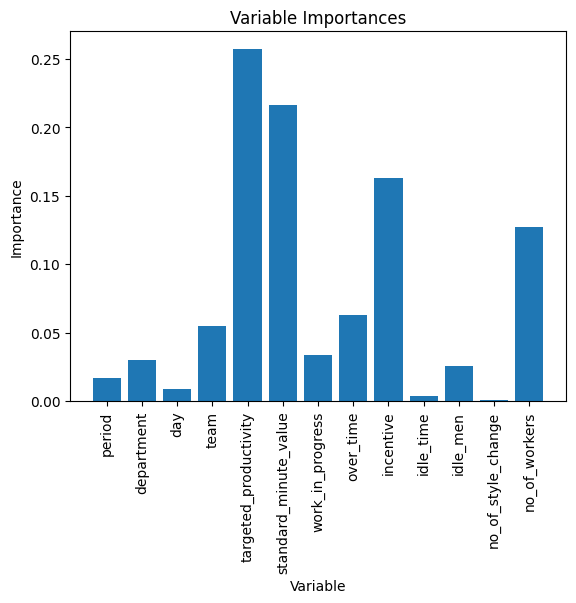

In [166]:
importances = gbr.feature_importances_
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(x_cols, importances)]

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

for feat, signif in feature_importances:
    print(f'Variable: {feat}, Importance: {signif}') 

plt.bar(x_cols, importances) 
plt.xticks(rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances')

In [167]:
Xm = num_df.drop(['actual_productivity','day','idle_time','no_of_style_change'], axis=1)

ym = num_df['actual_productivity']

X_trainm, X_testm, y_trainm, y_testm = train_test_split(Xm, ym, test_size = .2, random_state=0)

In [168]:
parameters = {'n_estimators': np.arange(100, 500, 100),
                'learning_rate': [0.01, 0.1, 1],
                'max_depth': np.arange(2,7)}
gdbr = GradientBoostingRegressor(random_state=0)

search = GridSearchCV(estimator=gdbr,param_grid=parameters,scoring='neg_mean_squared_error')
search.fit(X_trainm,y_trainm)
print(search.best_params_)

{'learning_rate': 0.1, 'max_depth': np.int64(3), 'n_estimators': np.int64(100)}


In [172]:
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
gbr.fit(X_trainm, y_trainm)

y_pred = gbr.predict(X_testm)

mae = metrics.mean_absolute_error(y_testm, y_pred)
mse = metrics.mean_squared_error(y_testm, y_pred)
rmse = np.sqrt(mean_squared_error(y_testm,y_pred))
mape = np.mean(np.abs((y_testm - y_pred) / y_testm)) * 100
r2 = r2_score(y_testm, y_pred)

mae_list.append((f'Baseline gradientboostv3 model MAE: {mae}'))
mse_list.append((f'Baseline gradientboostv3 model MSE: {mse}'))
rmse_list.append((f'Baseline gradientboostv3 model RMSE: {rmse}'))
mape_list.append((f'Baseline gradientboostv3 model MAPE: {mape}'))
r2_list.append((f'Baseline gradientboostv3 model R2: {r2}'))

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mape)
print('R2 Score:', r2)

Mean Absolute Error: 0.07635021748458605
Mean Squared Error: 0.013690285849958317
Root Mean Squared Error: 0.11700549495625544
Mean Absolute Percentage Error: 13.53678915170656
R2 Score: 0.536956143430873


In [170]:
parameters = {'n_estimators': np.arange(50, 500, 50),
                'min_samples_split': np.arange(5, 30, 5),
                'max_depth': np.arange(2,7)}
rforest = RandomForestRegressor(random_state=0)
search = GridSearchCV(estimator=rforest,param_grid=parameters,scoring='neg_mean_squared_error')
search.fit(X_trainm,y_trainm)
print(search.best_params_)

d:\Kuliah\Software\Visual Studio Code\Python\Cakap\Project\.venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'max_depth': np.int64(6), 'min_samples_split': np.int64(15), 'n_estimators': np.int64(150)}


In [171]:
forest = RandomForestRegressor(n_estimators = 150, random_state=0, min_samples_split = 15, max_depth=6)
forest.fit(X_trainm, y_trainm)

y_pred = forest.predict(X_testm)

mae = metrics.mean_absolute_error(y_testm, y_pred)
mse = metrics.mean_squared_error(y_testm, y_pred)
rmse = np.sqrt(mean_squared_error(y_testm,y_pred))
mape = np.mean(np.abs((y_testm - y_pred) / y_testm)) * 100
r2 = r2_score(y_testm, y_pred)

mae_list.append((f'Baseline forestv3 model MAE: {mae}'))
mse_list.append((f'Baseline forestv3 model MSE: {mse}'))
rmse_list.append((f'Baseline forestv3 model RMSE: {rmse}'))
mape_list.append((f'Baseline forestv3 model MAPE: {mape}'))
r2_list.append((f'Baseline forestv3 model R2: {r2}'))

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mape)
print('R2 Score:', r2)

Mean Absolute Error: 0.08203550958397074
Mean Squared Error: 0.01469966226360811
Root Mean Squared Error: 0.1212421637204158
Mean Absolute Percentage Error: 14.697258460403265
R2 Score: 0.5028162027146068
